In [1]:
using Pkg

Pkg.activate(".") # change path if you haven't launched notebook from base of repo
Pkg.instantiate()

  Activating project at `~/MolSSI_workshop`
    Updating registry at `~/.julia/registries/General.toml`
   Installed Bzip2_jll ── v1.0.8+2
   Installed ZeroMQ_jll ─ v4.3.5+1
    Updating `~/MolSSI_workshop/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.5.0
  [a93c6f00] + DataFrames v1.7.0
  [8bb1440f] + DelimitedFiles v1.9.1
  [31c24e10] + Distributions v0.25.112
  [7073ff75] + IJulia v1.25.0
  [67456a42] + OhMyThreads v0.7.0
  [91a5bcdd] + Plots v1.40.8
  [90137ffa] + StaticArrays v1.9.7
  [10745b16] + Statistics v1.11.1
  [1986cc42] + Unitful v1.21.0
  [9a3f8284] ~ Random ⇒ v1.11.0
    Updating `~/MolSSI_workshop/Manifest.toml`
  [7d9f7c33] + Accessors v0.1.38
  [66dad0bd] + AliasTables v1.1.3
  [198e06fe] + BangBang v0.4.3
  [6e4b80f9] + BenchmarkTools v1.5.0
  [d1d4a3ce] + BitFlags v0.1.9
  [ae650224] + ChunkSplitters v3.1.0
  [944b1d66] + CodecZlib v0.7.6
  [35d6a980] + ColorSchemes v3.26.0
  [3da002f7] + ColorTypes v0.11.5
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Co

## Linear Algebra
Here we'll demonstrate some basic linear algebraic functionality using the Base (i.e. built into Julia and doesn't need to be installed, only imported) [LinearAlgebra](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/) package.

In [2]:
using LinearAlgebra

Let's initialize a nice matrix:

In [3]:
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

What's its determinant? (Oops, maybe it's not so nice)

In [4]:
det(A)

-9.516197353929915e-16

Okay, let's make a new matrix and take the inverse:

In [5]:
B = [2 1 1; 1 2 1; 1 1 2]
inv(B)

3×3 Matrix{Float64}:
  0.75  -0.25  -0.25
 -0.25   0.75  -0.25
 -0.25  -0.25   0.75

How about eigendecomposition?

In [6]:
eig_B = eigen(B)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 0.9999999999999998
 1.0
 3.999999999999999
vectors:
3×3 Matrix{Float64}:
 -0.408248   0.707107  -0.57735
 -0.408248  -0.707107  -0.57735
  0.816497   0.0       -0.57735

By default an `Eigen` object is returned, which we can pull out the fields of as `eig_B.values` or `eig_B.vectors`, but we can also pre-assign them like this:

In [7]:
vals, vecs = eigen(B)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 0.9999999999999998
 1.0
 3.999999999999999
vectors:
3×3 Matrix{Float64}:
 -0.408248   0.707107  -0.57735
 -0.408248  -0.707107  -0.57735
  0.816497   0.0       -0.57735

Note that the eigenvectors are the columns...

In [8]:
vecs

3×3 Matrix{Float64}:
 -0.408248   0.707107  -0.57735
 -0.408248  -0.707107  -0.57735
  0.816497   0.0       -0.57735

We have a backslash like in MATLAB, too...

In [9]:
b = [1, 2, 3]
x = A \ b

3-element Vector{Float64}:
 -0.23333333333333334
  0.46666666666666673
  0.09999999999999994

More things!

We will solve the following system of equations:

```math
x_1 + 2x_2 - x_3 + x_4 = 1 \\
2x_1 - x_2 + 3x_3 - 2x_4 = 5 \\
-3x_1 + 4x_2 + 2x_3 + x_4 = 7 \\
x_1 - 3x_2 + 2x_3 - 4x_4 = -2 \\
```

This can be written in matrix form `Ax = b` as:

```math
A =
\begin{bmatrix}
1 & 2 & -1 & 1 \\
2 & -1 & 3 & -2 \\
-3 & 4 & 2 & 1 \\
1 & -3 & 2 & -4 \\
\end{bmatrix}
x =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{bmatrix}
b =
\begin{bmatrix}
1 \\
5 \\
7 \\
-2 \\
\end{bmatrix}
```

In [10]:
# Define matrix A and vector b
A = [1 2 -1 1; 2 -1 3 -2; -3 4 2 1; 1 -3 2 -4]
b = [1, 5, 7, -2]

# Solve for x using the backslash operator
x = A \ b

# Compute the rank of A
rank_A = rank(A)

# Compute the null space of A
null_space_A = nullspace(A)

# Compute the condition number of A
cond_A = cond(A)

# Display results
println("Solution x: ", x)
println("Rank of A: ", rank_A)
println("Null space of A: ", null_space_A)
println("Condition number of A: ", cond_A)

Solution x: [0.6235294117647063, 0.7176470588235293, 2.3529411764705888, 1.294117647058824]
Rank of A: 4
Null space of A: Matrix{Float64}(undef, 4, 0)
Condition number of A: 7.4635161399954475


#### Special Matrices

> **Symmetric Matrices**: Julia provides the `Symmetric` type for creating symmetric matrices, where the matrix is equal to its transpose. This saves storage space by storing only the upper triangular part of the matrix.

In [11]:
# Create a symmetric matrix
A = [1 2 3; 2 4 5; 3 5 6]
S = Symmetric(A)

println(S)

[1 2 3; 2 4 5; 3 5 6]


> **Sparse Matrices**: Sparse matrices are useful when you have a large matrix with mostly zero elements. Julia provides efficient storage and operations for sparse matrices via the `SparseArrays` package.

In [12]:
using SparseArrays

# Create a sparse matrix
I = sparse([1, 3, 4], [2, 1, 3], [10, 20, 30], 5, 5)

println(I)

sparse([3, 1, 4], [1, 2, 3], [20, 10, 30], 5, 5)


> **Diagonal Matrices**: Julia has a `Diagonal` type that stores only the diagonal elements of the matrix, making it memory-efficient and fast for certain operations.

In [13]:
# Create a diagonal matrix
d = Diagonal([1, 2, 3])

println(d)

[1 0 0; 0 2 0; 0 0 3]


> **Block Diagonal Matrices**: Using the `BlockDiagonals` package (or other similar libraries), you can create block diagonal matrices that store each diagonal block separately.

In [61]:
using BlockDiagonals

# Create a block diagonal matrix
D1 = Diagonal([1, 2, 3])
D2 = Diagonal([3, 4, 5])
BD = BlockDiagonal([D1, D2])

println(BD)

[1 0 0 0 0 0; 0 2 0 0 0 0; 0 0 3 0 0 0; 0 0 0 3 0 0; 0 0 0 0 4 0; 0 0 0 0 0 5]


> **Hermitian Matrices**: The `Hermitian` type in Julia is used for Hermitian matrices, which are complex square matrices that are equal to their own conjugate transpose.

In [15]:
# Create a Hermitian matrix
B = [1+im 2 3; 2 4 5; 3 5 6-im]
H = Hermitian(B)

println(H)

Complex{Int64}[1 + 0im 2 + 0im 3 + 0im; 2 + 0im 4 + 0im 5 + 0im; 3 + 0im 5 + 0im 6 + 0im]


## DataFrames
The [DataFrames](https://github.com/JuliaData/DataFrames.jl) package provides a similar set of functionality to pandas in Python. We'll import the package and start by creating a simple DataFrame to experiment with.

In [16]:
using DataFrames, Statistics

In [17]:
df = DataFrame(Name=["John", "Jane", "Jim"], Age=[28, 34, 45], Salary=[50000, 62000, 72000])

Row,Name,Age,Salary
,String,Int64,Int64
1,John,28,50000
2,Jane,34,62000
3,Jim,45,72000


Add a new column:

In [18]:
df.Status = ["Single", "Married", "Single"]

3-element Vector{String}:
 "Single"
 "Married"
 "Single"

Let's filter for people over 30...

In [19]:
filtered_df = filter(row -> row.Age > 30, df)

Row,Name,Age,Salary,Status
,String,Int64,Int64,String
1,Jane,34,62000,Married
2,Jim,45,72000,Single


The `describe` function gives us some summary statistics...

In [20]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Name,,Jane,,John,0,String
2,Age,35.6667,28,34.0,45,0,Int64
3,Salary,61333.3,50000,62000.0,72000,0,Int64
4,Status,,Married,,Single,0,String


There's also grouping and aggregate calculation functionality...

In [21]:
grouped = groupby(df, :Status)
agg_df = combine(grouped, :Salary => mean => :AvgSalary)

Row,Status,AvgSalary
,String,Float64
1,Single,61000.0
2,Married,62000.0


## Random Number (and more!) generation
As with any self-respecting scientific programming language, Julia has extensive functionality for randomness. The core base function is `rand`, which we demonstrate in a few (of [many](https://docs.julialang.org/en/v1/stdlib/Random/)) variations below...

In [22]:
rand() # without arguments, will draw a single float from U(0,1)

0.2229657950707743

In [23]:
rand(3,2) # now make it a matrix

3×2 Matrix{Float64}:
 0.559219   0.655938
 0.0841798  0.3056
 0.174777   0.174348

In [24]:
rand(Int, 2, 2) # we can also specify a type; now it will draw from the full range of values for that type

2×2 Matrix{Int64}:
 3522631525862259137   8092929464017294549
 4810713083562438739  -1187758933991217738

In [25]:
rand(['a', 'b', 'c']) # can also draw from a provided collection of objects

'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)

In [26]:
rand(0:2:100) # anything iterable counts

50

In [27]:
randn(1,4) # draw from standard normal

1×4 Matrix{Float64}:
 -0.32654  -0.0762352  -1.12162  0.554925

In [28]:
using Plots

Let us use `rand` and `randn` to generate and plot distributions...

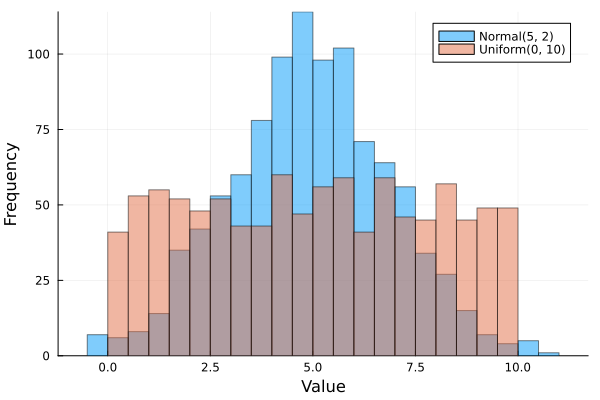

In [66]:
# Generate sample data for plotting
normal_samples = randn(1000) * 2 .+ 5    # Normal distribution N(5, 2)
uniform_samples = rand(1000) * 10       # Uniform distribution U(0, 10)

# Plot histograms for comparison
histogram(normal_samples, bins=30, alpha=0.5, label="Normal(5, 2)", xlabel="Value", ylabel="Frequency")
histogram!(uniform_samples, bins=30, alpha=0.5, label="Uniform(0, 10)")

In this case we have seen the use of `!` to modify the input argument in place. This is a common convention in Julia, and is used to indicate that the function modifies its input arguments.

#### More plot examples

> **Line Plot**: A basic line plot with labels and title.

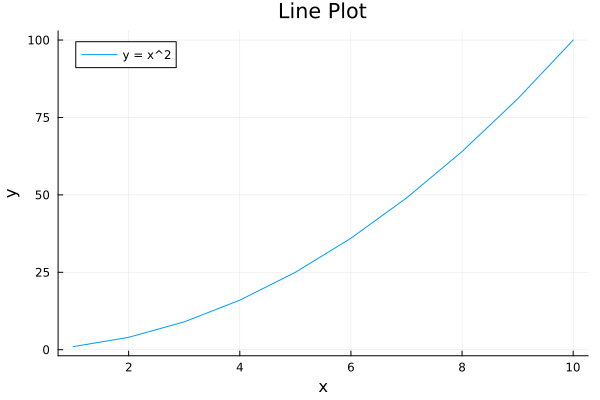

In [30]:
# Generate some data
x = 1:10
y = x .^ 2

# Line plot
plot(x, y, label="y = x^2", xlabel="x", ylabel="y", title="Line Plot")

> **Scatter Plot**: A scatter plot to show individual points.

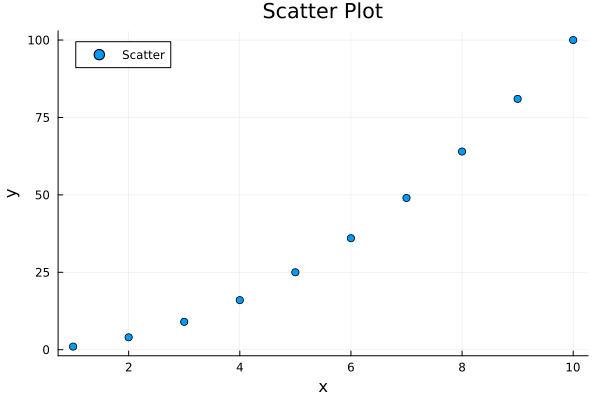

In [31]:
# Scatter plot
scatter(x, y, label="Scatter", xlabel="x", ylabel="y", title="Scatter Plot")

> **Bar Plot**: A bar plot to visualize categorical data.

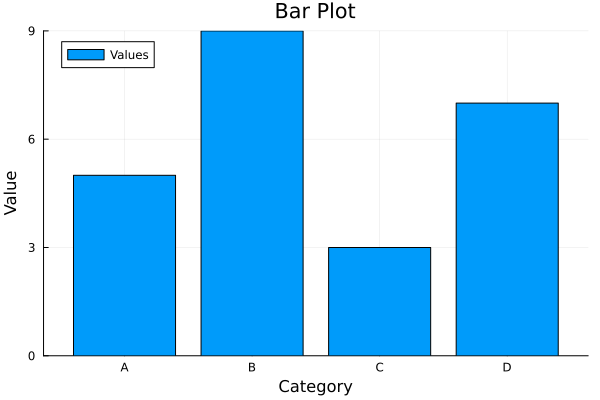

In [32]:
# Bar plot
categories = ["A", "B", "C", "D"]
values = [5, 9, 3, 7]

bar(categories, values, label="Values", title="Bar Plot", xlabel="Category", ylabel="Value")

> **Heatmap**: A heatmap to show a matrix of values.

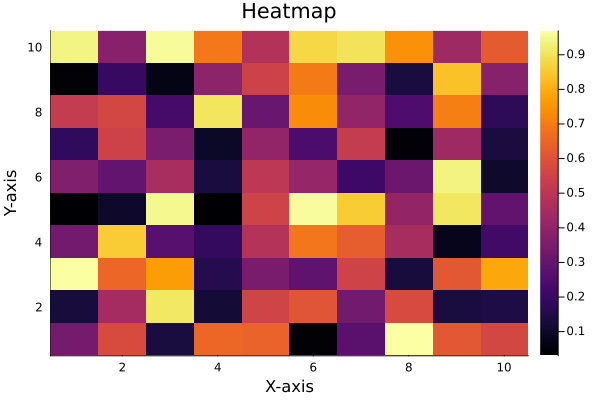

In [33]:
# Heatmap data
z = rand(10, 10)

# Heatmap plot
heatmap(z, title="Heatmap", xlabel="X-axis", ylabel="Y-axis")

> **Pie Chart**: A pie chart for visualizing proportions of categories.

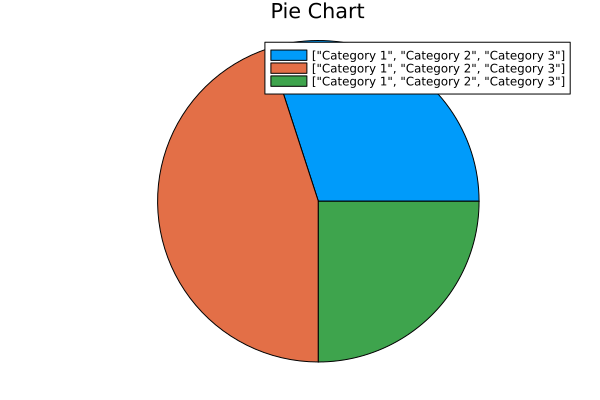

In [34]:
# Pie chart data
labels = ["Category 1", "Category 2", "Category 3"]
sizes = [30, 45, 25]

# Pie chart
pie(sizes, labels=labels, title="Pie Chart")

> **3D Plot**: A 3D plot to visualize functions or data in three dimensions.

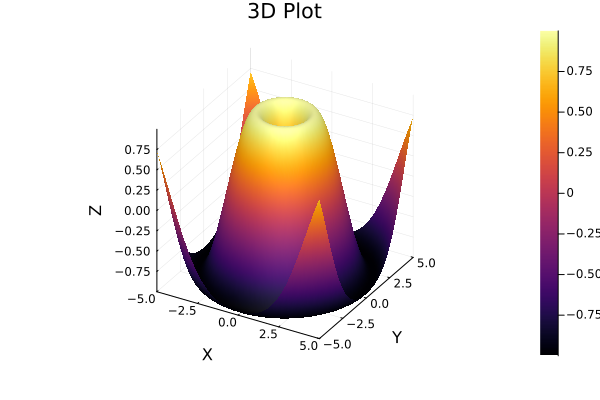

In [35]:
# 3D plot data
x = -5:0.1:5
y = -5:0.1:5
z = [sin(sqrt(xi^2 + yi^2)) for xi in x, yi in y]

# 3D surface plot
plot(x, y, z, st=:surface, title="3D Plot", xlabel="X", ylabel="Y", zlabel="Z")

**Note**: The `Plots` package is a powerful and flexible plotting library in Julia, and it supports many different plot types and customization options. You can refer to the [Plots.jl documentation](http://docs.juliaplots.org/latest/) for more information on how to create different types of plots and customize them to suit your needs.

### Unitful
[Unitful.jl](https://painterqubits.github.io/Unitful.jl/stable/) is a Julia package for handling units and dimensions. It can be very useful for doing unit conversions and catching dimensional errors, but is also sometimes more trouble than it's worth to actually store every quantity in your code with units...

In [36]:
using Unitful

In [37]:
1.0u"m/s"

1.0 m s⁻¹

In [38]:
1.0u"N*m"

1.0 m N

In [39]:
u"m,kg,s"

(m, kg, s)

In [40]:
typeof(1.0u"m/s")

Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(m, s⁻¹), 𝐋 𝐓⁻¹, nothing}}

In [41]:
u"ħ"

1.0545718176461565e-34 J s

##### Converting between units

Convert a `Unitful.Quantity` to different units. The conversion will fail if the target units a have a different dimension than the dimension of the quantity `x`. You can use this method to switch between equivalent representations of the same unit, like `N m` and `J`.

In [42]:
uconvert(u"hr",3602u"s")

1801//1800 hr

Since objects are callable, we can also make `Unitful.Units` callable with a Number as an argument, for a unit conversion shorthand:

In [43]:
u"cm"(1u"m")

100 cm

In [44]:
1u"m" |> u"cm"

100 cm

##### Dimensioless quantities

In [45]:
uconvert(NoUnits, 1.0u"μm/m")

1.0e-6

In [67]:
uconvert(NoUnits, 1.0u"m")

Unitful.DimensionError: DimensionError:  and m are not dimensionally compatible.

In [47]:
convert(Float64, 1.0u"μm/m")

1.0e-6

##### Creating your own units

If a different set of default units or dimensions is desired, macros for generating units and dimensions are provided. To create new units interactively, most users will be happy with the `@unit` macro and the `Unitful.register` function, which makes units defined in a module available to the `@u_str` string macro.

An example of defining units in a module:

In [48]:
module MyUnits; 

using Unitful;

@unit myMeter "m" MyMeter 1u"m" false; 

end


Main.MyUnits

In [49]:
MyUnits

Main.MyUnits

In [50]:
using Unitful

In [51]:
u"myMeter"

LoadError: LoadError: ArgumentError: Symbol myMeter could not be found in unit modules Module[Unitful]
in expression starting at /Users/leticiamadureira/MolSSI_workshop/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y121sZmlsZQ==.jl:1

In [52]:
Unitful.register(MyUnits);

You can also define units directly in the `Main` module at the `REPL`:

```julia
julia> using Unitful

julia> Unitful.register(@__MODULE__);

julia> @unit M "M" Molar 1u"mol/L" true;

julia> 1u"mM"
1 mM
```